## Web Scraping "STEAMCHARTS"

Top Games by current players.


https://steamcharts.com/top/p.1

In [3]:
# install dependencies
!pip install beautifulsoup4
!pip install lxml
!pip install requests
!pip install pandas

In [6]:
# import dependencies
from bs4 import BeautifulSoup
import requests
import lxml
# import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
# create instance
soup = BeautifulSoup()

In [104]:
# requesting html text from webpage
html_text = requests.get('https://steamcharts.com/top/p.1').text

In [109]:
# request code status, 200 is conventional number for request was successful
html_text[:500]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n<meta charset="utf-8">\n<title>Steam Charts - Tracking What\'s Played</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="description" content="An ongoing analysis of Steam&#39;s player numbers, seeing what&#39;s been played the most.">\n<meta property="twitter:account_id" content="4503599630058963">\n\n\n<script async src="https://kumo.network-n.com/dist/app.js" site="steam-charts"></script>\n<link href="/assets/style-9826'

In [106]:
# create instance
soup = BeautifulSoup(html_text, 'lxml')

In [111]:
# finding all game names

# <td class="game-name left">
# 	<a href="/app/570">
# 		Dota 2
# 	</a>
# </td>
names = soup.find_all('td', class_='game-name left')

In [118]:
names[0].text

'\n\n\t\t\t\t\t\tCounter-Strike: Global Offensive\n\t\t\t\t\t\n'

In [113]:
# removing unwanted characters
names[0].text.replace('\t', '').replace('\n', '')

'Counter-Strike: Global Offensive'

In [114]:
# creating a list of game names
game_names = []

for name in names:
    game_names.append(name.text.replace('\t', '').replace('\n', ''))

game_names[:5]

['Counter-Strike: Global Offensive',
 'Dota 2',
 'PUBG: BATTLEGROUNDS',
 'Apex Legends',
 'Team Fortress 2']

In [116]:
# searching for numerical data

# <td class="num">371,540</td>

players = soup.find_all('td', class_='num')

In [11]:
# return list as [current_players_count, peak_player_count, hours_played]
players[:6]

[<td class="num">381546</td>,
 <td class="num period-col peak-concurrent">864966</td>,
 <td class="num period-col player-hours">367723140</td>,
 <td class="num">345928</td>,
 <td class="num period-col peak-concurrent">752482</td>,
 <td class="num period-col player-hours">315783023</td>]

In [13]:
# sorting numerical data into respective lists

current_players_count = []
peak_players_count = []
hours_played = []

state = 0

for i in players:
    if state == 0:
        current_players_count.append(i.text)
        state = 1
    elif state == 1:
        peak_players_count.append(i.text)
        state = 2
    elif state == 2:
        hours_played.append(i.text)
        state = 0

In [14]:
current_players_count[:3]

['381546', '345928', '172929']

In [15]:
# creating a dictionary 
count_dict = {'title': game_names,
              'current players': current_players_count,
              'peak players': peak_players_count,
              'hours played': hours_played}

In [16]:
# creating dataframe  
df = pd.DataFrame(count_dict)
df = df.set_index('title')

In [17]:
df.head()

,current players,peak players,hours played
Name,,,
Counter-Strike: Global Offensive,381546,864966,367723140
Dota 2,345928,752482,315783023
New World,172929,913027,285678751
PUBG: BATTLEGROUNDS,162522,393496,114424498
Apex Legends,113798,246412,92036566


In [91]:
# https://steamcharts.com/top/p.
# how many pages

def get_data(url, num_pages=1):

    # create instance
    soup = BeautifulSoup()

    # lists for different variables
    game_names = []
    current_players_count = []
    peak_players_count = []
    hours_played = []

    for page in range(num_pages + 1):
        if page >= 1:
            # get html text from web page
            html_text = requests.get('{0}{1}'.format(url, page)).text
#             print(html_text)
            soup = BeautifulSoup(html_text, 'lxml')
            # search for game names
            names = soup.find_all('td', class_='game-name left')
            # remove unwanted characters
            # names[0].text.replace('\t','').replace('\n','')

            # append game names and removed unwanted characters
            for name in names:
                game_names.append(name.text.replace(
                    '\t', '').replace('\n', ''))

            # filter out all numerical data
            players = soup.find_all('td', class_='num')

            # numerical data is returns all in one list
            # [current_players_count, peak_player_count, hours_played]
            # [<td class="num">381546</td>,
            #  <td class="num period-col peak-concurrent">864966</td>,
            #  <td class="num period-col player-hours">367723140</td>,
            #  <td class="num">345928</td>,
            #  <td class="num period-col peak-concurrent">752482</td>,
            #  <td class="num period-col player-hours">315783023</td>]

            # state is to choose which list to add what too
            state = 0
            # loop through data appending to correct list
            for i in players:
                if state == 0:
                    current_players_count.append(i.text)
                    state = 1
                elif state == 1:
                    peak_players_count.append(i.text)
                    state = 2
                elif state == 2:
                    hours_played.append(i.text)
                    state = 0

    # dictionary of all the data
    data_dict = {'game title': game_names,
                 'current players': current_players_count,
                 'peak players': peak_players_count,
                 'hours played': hours_played}

    # create a dataframe
    df = pd.DataFrame(data_dict)
    df = df.set_index('game title')

    return df

In [92]:
url = 'https://steamcharts.com/top/p.'
df = get_data(url, 4)

In [93]:
df.head(2)

,current players,peak players,hours played
game title,,,
Counter-Strike: Global Offensive,331340,864966,367309270
Dota 2,328994,752482,317086456


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Counter-Strike: Global Offensive to Pathfinder: Wrath of the Righteous
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   current players  100 non-null    object
 1   peak players     100 non-null    object
 2   hours played     100 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


Here we can see that all data types are objects when they should be int's.

In [95]:
df["current players"] = pd.to_numeric(df["current players"])
df["peak players"] = pd.to_numeric(df["peak players"])
df["hours played"] = pd.to_numeric(df["hours played"])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Counter-Strike: Global Offensive to Pathfinder: Wrath of the Righteous
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   current players  100 non-null    int64
 1   peak players     100 non-null    int64
 2   hours played     100 non-null    int64
dtypes: int64(3)
memory usage: 3.1+ KB


In [97]:
df.describe()

,current players,peak players,hours played
count,100.000000,100.000000,1.000000e+02
mean,22700.040000,67195.680000,2.468756e+07
std,48521.734884,146707.529034,5.600407e+07
min,4497.000000,5949.000000,1.703666e+06
25%,6454.250000,19306.000000,6.339647e+06
50%,9495.500000,27793.500000,1.076644e+07
75%,16958.750000,51129.750000,1.833588e+07
max,331340.000000,913027.000000,3.673093e+08


## Most played games

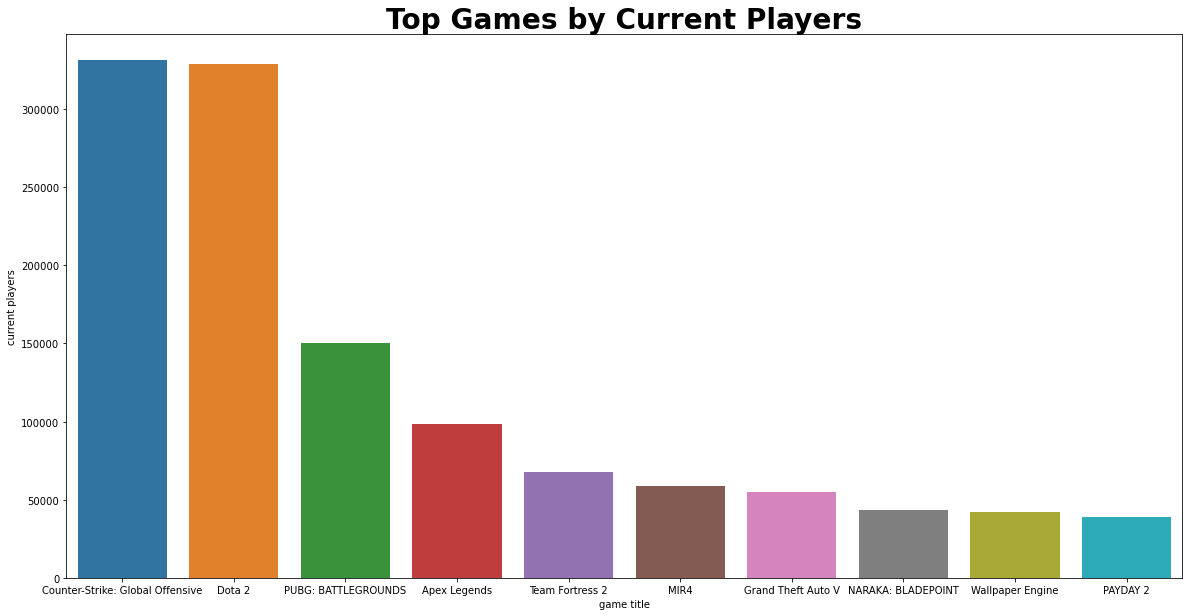

In [98]:
# Plotting Data
current_players = df.sort_values('current players', ascending=False)[:10]

plt.figure(figsize=(20, 10))
sns.barplot(data=current_players, x=current_players.index,
            y='current players', linewidth=1)

plt.title('Top Games by Current Players', size=28, fontweight="bold")
plt.show()

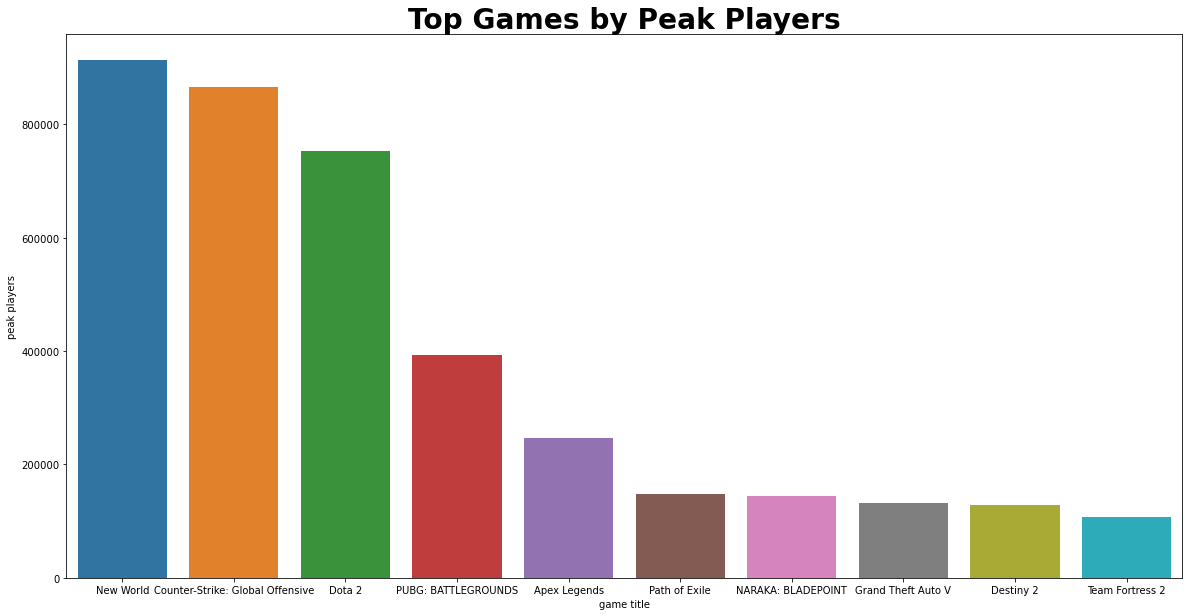

In [99]:
# Plotting Data
peak_players = df.sort_values('peak players', ascending=False)[:10]

plt.figure(figsize=(20, 10))
sns.barplot(data=peak_players, x=peak_players.index,
            y='peak players', linewidth=1)

plt.title('Top Games by Peak Players', size=28, fontweight="bold")
plt.show()

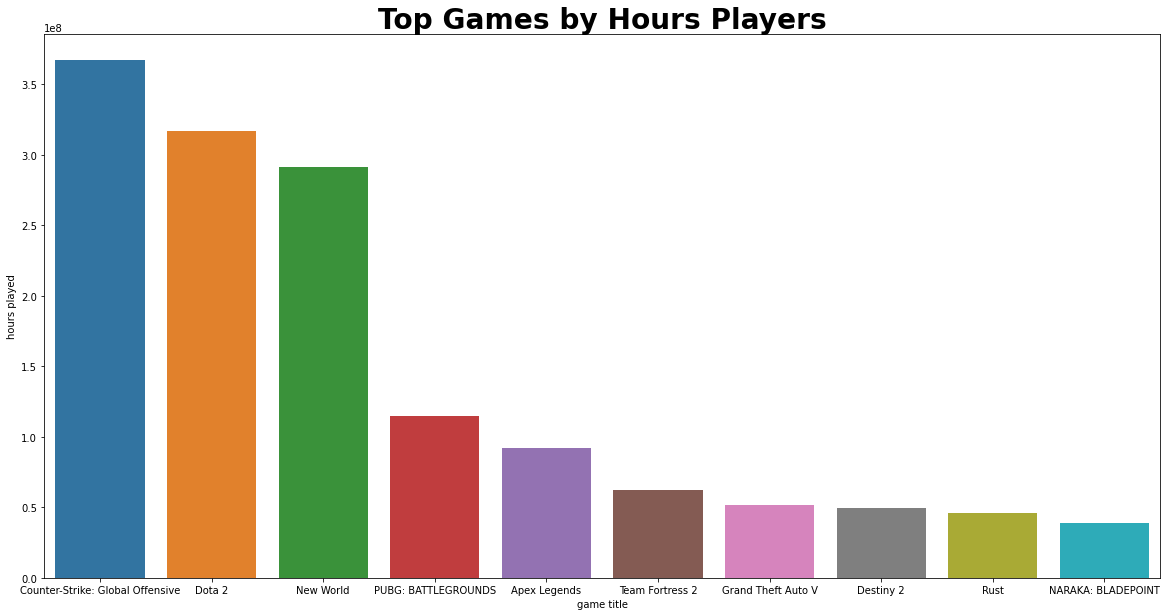

In [100]:
# Plotting Data
peak_players = df.sort_values('hours played', ascending=False)[:10]

plt.figure(figsize=(20, 10))
sns.barplot(data=peak_players, x=peak_players.index,
            y='hours played', linewidth=1)

plt.title('Top Games by Hours Players', size=28, fontweight="bold")
plt.show()